# Cluster People Income Base on Age

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_excel("incomeKmeans.xlsx")
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


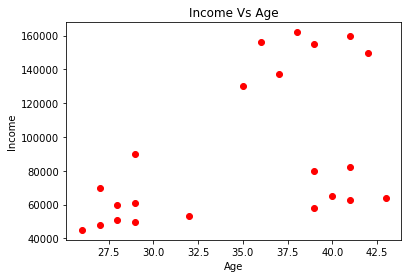

In [3]:
plt.scatter(df.Age, df.Income, color="red")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Income Vs Age")
plt.show()

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_pred=km.fit_predict(df[["Age","Income"]])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df["Cluster"]=y_pred
df.head()

,Name,Age,Income,Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


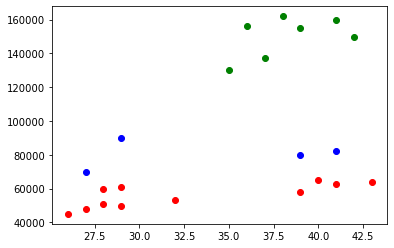

In [7]:
df1 = df[df["Cluster"]==0]
df2 = df[df["Cluster"]==1]
df3 = df[df["Cluster"]==2]

plt.scatter(df1.Age, df1.Income, color="red")
plt.scatter(df2.Age, df2.Income, color="green")
plt.scatter(df3.Age, df3.Income, color="blue")

plt.show()

### The above problem happened due to non scaling of the features

## Scaling The Features

In [8]:
scaler=MinMaxScaler()
scaler.fit(df[["Age", "Income"]])

MinMaxScaler()

In [9]:
df[["Age", "Income"]]=scaler.transform(df[["Age", "Income"]])

In [10]:
df

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [11]:
km=KMeans(n_clusters=3)
y_pred = km.fit_predict(df[["Age", "Income"]])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [12]:
df["scaled_cluster"] = y_pred
df.head()

,Name,Age,Income,Cluster,scaled_cluster
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1


In [13]:
km.cluster_centers_ #Centroids (x,y)

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [14]:
km.inertia_

0.4750783498553096

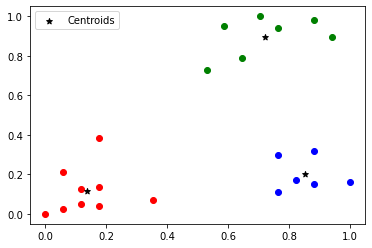

In [15]:
df1 = df[df["scaled_cluster"]==0]
df2 = df[df["scaled_cluster"]==1]
df3 = df[df["scaled_cluster"]==2]

plt.scatter(df1.Age, df1["Income"], color="red")
plt.scatter(df2.Age, df2.Income, color="green")
plt.scatter(df3.Age, df3.Income, color="blue")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color="black", marker="*", label="Centroids")
plt.legend()
plt.show()

## Elbow Plot Method

In [16]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age","Income"]])
    km.inertia_
    sse.append(km.inertia_)

In [17]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.21055478995472496,
 0.18279994469329933,
 0.1327661931978319,
 0.10663983840905436]

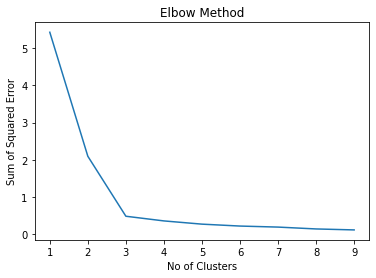

In [18]:
plt.plot(k_range, sse)
plt.xlabel("No of Clusters")
plt.ylabel("Sum of Squared Error")
plt.title("Elbow Method")
plt.show()

# Excercise

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [73]:
df= pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
target=df.species

In [74]:
df_new = df.drop(["sepal_length","sepal_width","species"], axis=1)
df_new.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


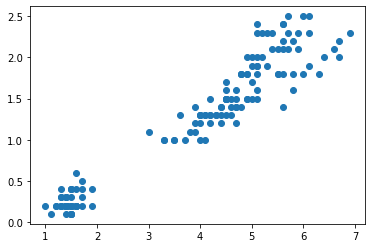

In [47]:
plt.scatter(df_new.petal_length, df_new.petal_width)
plt.show()

# For K=2

In [23]:
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(df_new)
df_new["Cluster"] = y_pred
df_new.head()

,petal_length,petal_width,Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [24]:
df_new.head()

,petal_length,petal_width,Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [25]:
km.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49411765, 0.26078431]])

In [26]:
km.inertia_

86.40394533571002

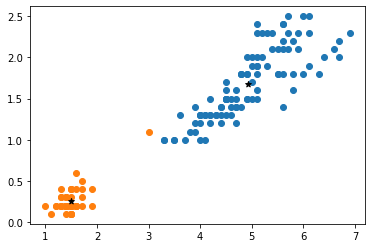

In [27]:
df1=df_new[df_new["Cluster"]==0]
df2=df_new[df_new["Cluster"]==1]

plt.scatter(df1.petal_length, df1.petal_width)
plt.scatter(df2.petal_length, df2.petal_width)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker="*", color="black")
plt.show()

### After Scaling

In [38]:
scaler=MinMaxScaler()
scaler.fit(df_new[["petal_length","petal_width"]])
df_new[["petal_length","petal_width"]] = scaler.transform(df_new[["petal_length","petal_width"]])
df_new.head()

,petal_length,petal_width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [39]:
km2 = KMeans(n_clusters=2)
y_pred = km2.fit_predict(df_new)
df_new["Cluster"] = y_pred
df_new.head()

,petal_length,petal_width,Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [40]:
km2.cluster_centers_

array([[0.6620339 , 0.65666667],
       [0.07864407, 0.06      ]])

In [42]:
km2.inertia_

5.179687509974784

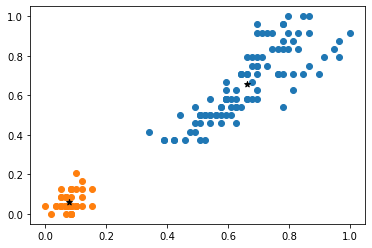

In [44]:
df1=df_new[df_new["Cluster"]==0]
df2=df_new[df_new["Cluster"]==1]

plt.scatter(df1.petal_length, df1.petal_width)
plt.scatter(df2.petal_length, df2.petal_width)
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1], marker="*", color="black")
plt.show()

# K=3

In [54]:
km3 = KMeans(n_clusters=3)
y_pred = km3.fit_predict(df_new)
df_new["Cluster"] = y_pred
df_new.head()

,petal_length,petal_width,Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [55]:
km3.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

In [58]:
km3.inertia_

31.387758974358984

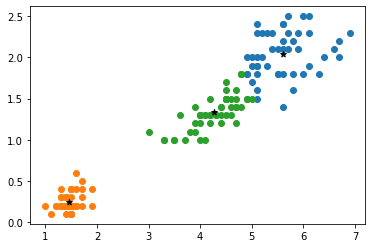

In [59]:
df1=df_new[df_new["Cluster"]==0]
df2=df_new[df_new["Cluster"]==1]
df3=df_new[df_new["Cluster"]==2]
plt.scatter(df1.petal_length, df1.petal_width)
plt.scatter(df2.petal_length, df2.petal_width)
plt.scatter(df3.petal_length, df3.petal_width)
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1], marker="*", color="black")
plt.show()

# Scaling

In [77]:
scaler=MinMaxScaler()
scaler.fit(df_new[["petal_length","petal_width"]])
df_new[["petal_length","petal_width"]] = scaler.transform(df_new[["petal_length","petal_width"]])
df_new.head()

,petal_length,petal_width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [67]:
km4 = KMeans(n_clusters=3)
y_pred = km4.fit_predict(df_new)
df_new["Cluster"] = y_pred
df_new.head()

,petal_length,petal_width,Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [68]:
km4.cluster_centers_

array([[0.07864407, 0.06      ],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

In [69]:
km4.inertia_

1.7050986081225128

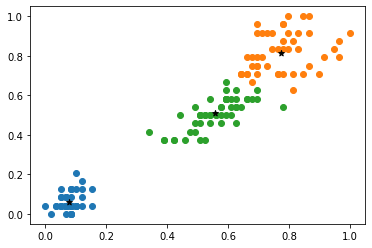

In [70]:
df1=df_new[df_new["Cluster"]==0]
df2=df_new[df_new["Cluster"]==1]
df3=df_new[df_new["Cluster"]==2]
plt.scatter(df1.petal_length, df1.petal_width)
plt.scatter(df2.petal_length, df2.petal_width)
plt.scatter(df3.petal_length, df3.petal_width)
plt.scatter(km4.cluster_centers_[:,0],km4.cluster_centers_[:,1], marker="*", color="black")
plt.show()

# Elbow Method

In [78]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df_new)
    km.inertia_
    sse.append(km.inertia_)

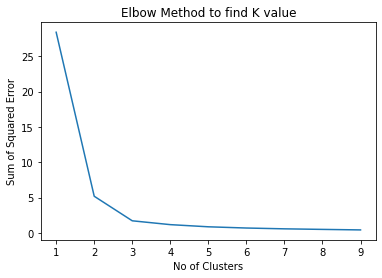

In [81]:
plt.plot(k_range,sse)
plt.xlabel("No of Clusters")
plt.ylabel("Sum of Squared Error")
plt.title("Elbow Method to find K value")
plt.show()

### It is clear that K should be 3